## Question 1
Spam filtering is an example of document classification task which involves classifying an email / SMS as spam or non-spam (a.k.a. ham).

1. Import the dataset from https://www.kaggle.com/uciml/sms-spam-collection-dataset. (1 point).
2. Split the data into training and testing. (1 point). Use 10-fold cross validation.(1 point)
3. Extract features using TF-IDF and display the features. ( 2 points)
4. Model and train the classifier using GaussianNB, BernoulliNB and MultinomialNB.( 3 points)
5. Evaluate classifiers on Test Data. ( 2 points)
6. Plot the decision boundary, visualize training and test results of all the models (3 points)

In [1]:
# importing required packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data from csv to dataset
dataset = pd.read_csv('spam.csv', delimiter=',',encoding='latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Removing unncessary columns
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [5]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# get the list of features
vectorizer = TfidfVectorizer()

In [7]:
X = dataset.v2
y = dataset.v1

In [8]:
model_list = []
accuracy_score_list = []
def plot_confusion_matrices(confusion_matrices):
    fig, axs = plt.subplots(2,5, figsize=(15,5)) 

    m = 0
    for i, ax_r in enumerate(axs):
        for j, ax in enumerate(ax_r):
            sns.heatmap(confusion_matrices[m], annot=True, cbar=False, cmap='Blues', fmt='g', ax = ax)
            ax.set_xlabel('Predicted label')
            ax.set_ylabel('True label')
            ax.set_title('{} {}'.format('fold', (m + 1)), fontsize=12, fontweight='bold')
            m += 1

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.tight_layout()
    plt.show()

0.8987760854037568


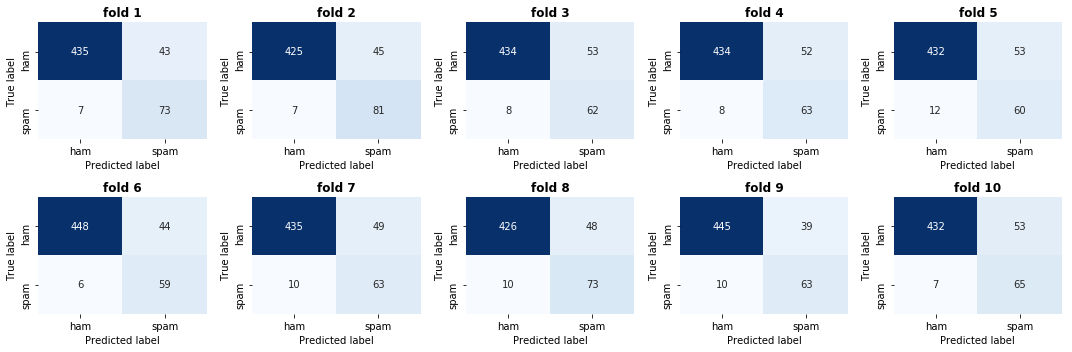

In [9]:
scores = []
m1 = GaussianNB()
model_list.append('Gaussian Naive Bayes')
conf_matrices = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    m1.fit(X_train_transformed.toarray(), y_train)
    y_pred = m1.predict(X_test_transformed.toarray())
    scores.append(m1.score(X_test_transformed.toarray(), y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

0.9786426259467321


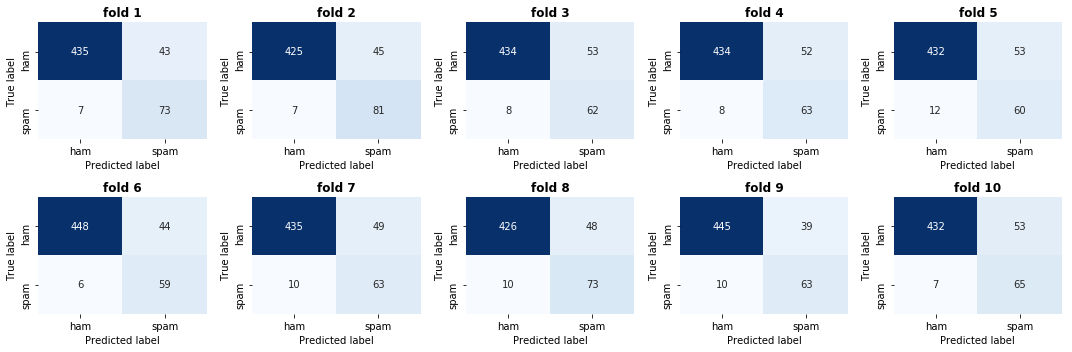

In [10]:
scores = []
m2 = BernoulliNB()
model_list.append('Bernoulli Naive Bayes')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    m2.fit(X_train_transformed.toarray(), y_train)
    y_pred = m2.predict(X_test_transformed.toarray())
    scores.append(m2.score(X_test_transformed.toarray(), y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

0.9606973481850414


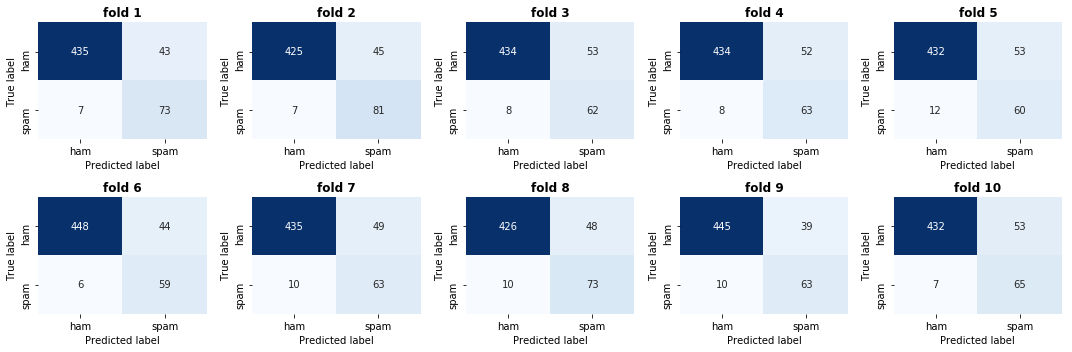

In [11]:
scores = []
m3 = MultinomialNB()
model_list.append('Multinomial Naive Bayes')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    m3.fit(X_train_transformed.toarray(), y_train)
    y_pred = m3.predict(X_test_transformed.toarray())
    scores.append(m3.score(X_test_transformed.toarray(), y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

In [14]:
results = pd.DataFrame(accuracy_score_list, index=list(model_list), columns=['test_accuracy'])
results

,test_accuracy
Gaussian Naive Bayes,0.898776
Bernoulli Naive Bayes,0.978643
Multinomial Naive Bayes,0.960697


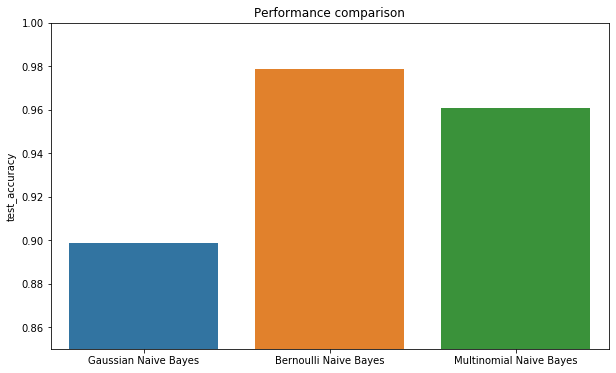

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(y ='test_accuracy', x=results.index, data=results)
plt.ylim(0.85, 1.0)
plt.title('Performance comparison')
plt.show()